In [90]:
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
# Reading all snapshots (trajectory).
log_df = pd.read_csv(f'./tif320-computational-materials-and-molecular-physics/Na-aimd/cluster24.log', sep = '\s+', skiprows = 1, \
         names = ['t', 'E_tot', 'E_pot', 'E_kin', 'T']) # Reference. Can change name to 'NaCluster24.log' to analyse the case with Na^+ included.
time = log_df['t']; T = log_df['T']

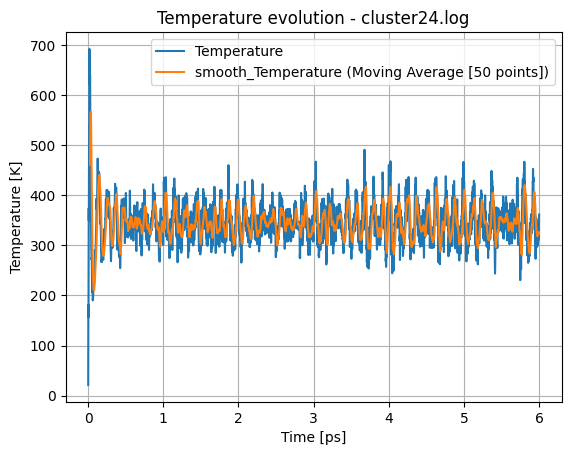

In [95]:
# Smoothing - through 'Moving Average'. (Sort of a low-pass filter)
smooth_T = pd.Series(T).rolling(window = 50).mean()

# Plotting results as graph:
plt.plot(time, T, label = r'Temperature')
plt.plot(time, smooth_T, label = r'smooth_Temperature (Moving Average [50 points])')

# plt.grid(True)
plt.xlabel(r'Time [ps]')
plt.ylabel(r'Temperature [K]')
plt.title(r'Temperature evolution - cluster24.log')
plt.grid(True)
plt.legend()
plt.savefig('Task1_Temperature_Graph.png', dpi = 500)
plt.show()

$\textbf{Note:}$ In this task, we add an Na $\textbf{atom}$ to the simulation, at a certain Snapshot (12000), in a certain position, not too close to other water molecules. However, we're not explicitly adding an $\textbf{ion}$. We then need to specify $\verb|charge = 1|$ in the code, so as to reflect the fact that this is, in fact, an ion! In DFT, the considered charge is 'delocalized' (?), which means that simply specifying $\verb|charge = 1|$ will do the trick. DFT will then optimize the charge distribution (density), which should result in an electron deficit near the Na atom, thus defining an $Na^+$ ion, as expected. This will be the most energetically favourable configuration.

$\textbf{Re-written:}$ DFT considers a 'delocalized' electron density, over the entire span of the system. It will then optimize this density, which should result in the electron deficit being located close to the Na atom, thus forming the ion (This will be the most stable configuration). That's why it suffices to specify $\verb|charge = 1|$, in our calculations.